<a href="https://colab.research.google.com/github/shris124/InsuranceEDA/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi my name is Shri. Today, we will be conducting exploratory data analysis on our dataset. The dataset we will be using today is the [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance). This dataset contains the data of clients and their charges for this insurance company.

In [2]:
# imported libraries requred for data analysis
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

Using the data, our job will be to predict customer charges for an insurance company based of the given variables. First we are going to upload our data.

In [3]:
#upload data from local drive
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [5]:
#Create the dataframe that will allow us to analyze the data
df = pd.read_csv('insurance.csv')
#Lets view the first five rows of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


After uploading the data and viewing the first five rows, we still need to understand what we are looking at.

In [6]:
# View the columns headers and the number of row we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Lets generate descriptive statistics for the columns and their values.

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the data above, we can see that youngest person in this dataset is 18. The oldest is 64. We also can see that the max charge is ~63770.43. This may be unusal value. We can investigate it more later.


# DATA CLEANING
Lets clean our data of missing values or duplicated values.

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Luckly we have no null values. Lets view duplicate values

In [10]:
#View any duplicated observations
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


We have only one duplicated value. Lets remove it.

In [11]:
df.drop_duplicates(keep='first',inplace=True)

# Data Visualization
Univarite Analysis. We are going to understand the distribution of values for a single variable.
# Charges

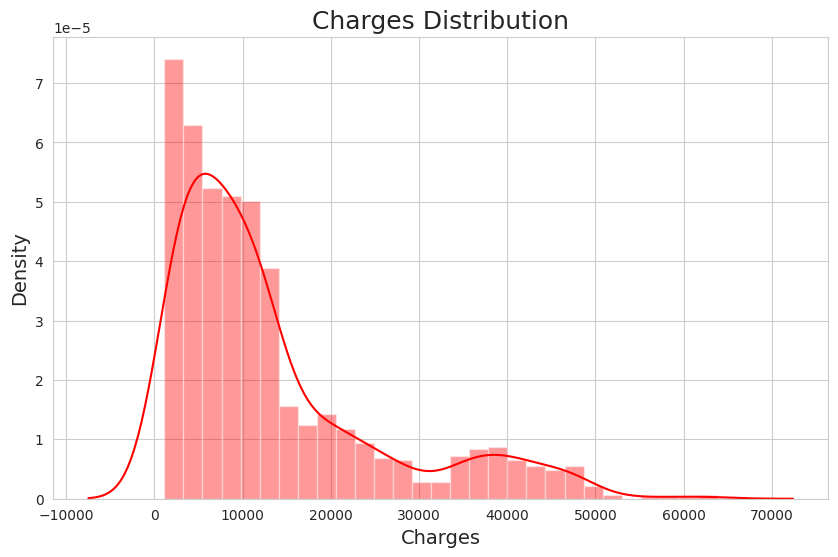

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='r')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

Our data is sketed to the right.

#Age
We are going to look at the distribution of our age column.

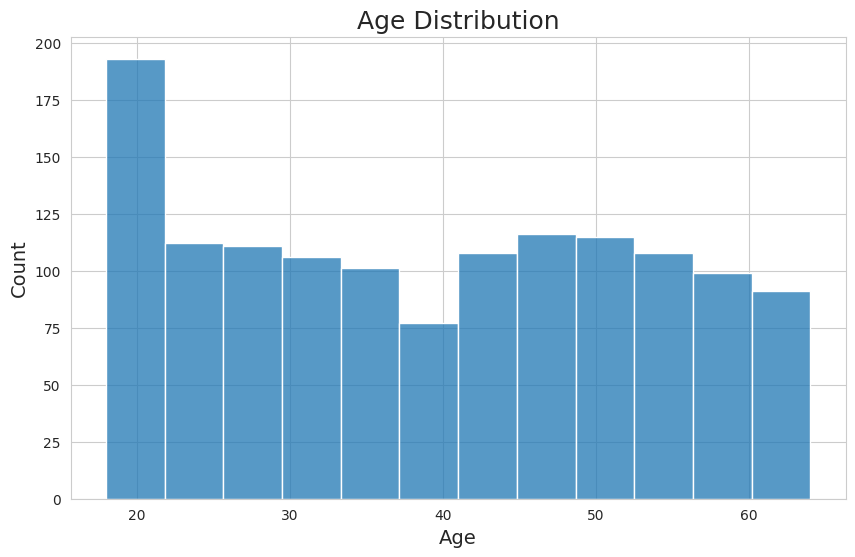

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

Our data looks uniformly distributed.

#BMI
We are going to look at the distribution of our BMI column.

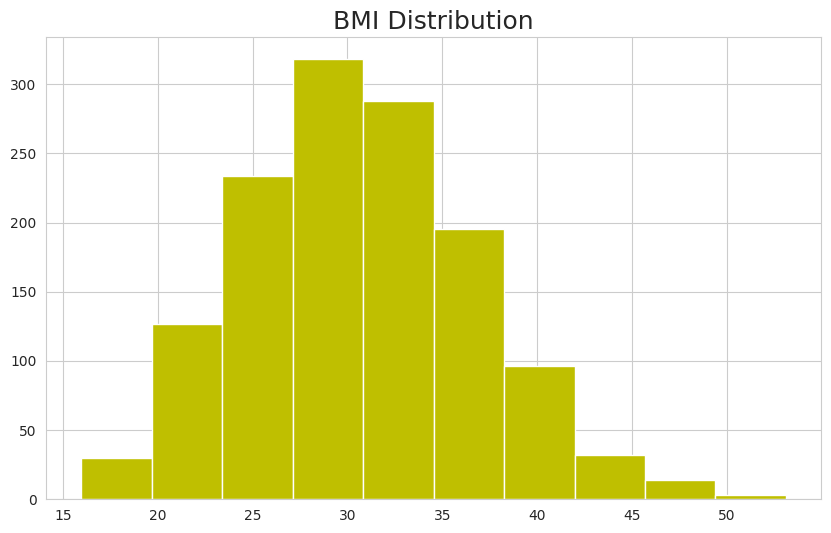

In [14]:
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()


Our data looks normally distributed.

# Boxplot of Charges Column
We are going to use a boxplot to detect outliers using IQR(Interquartile Range).

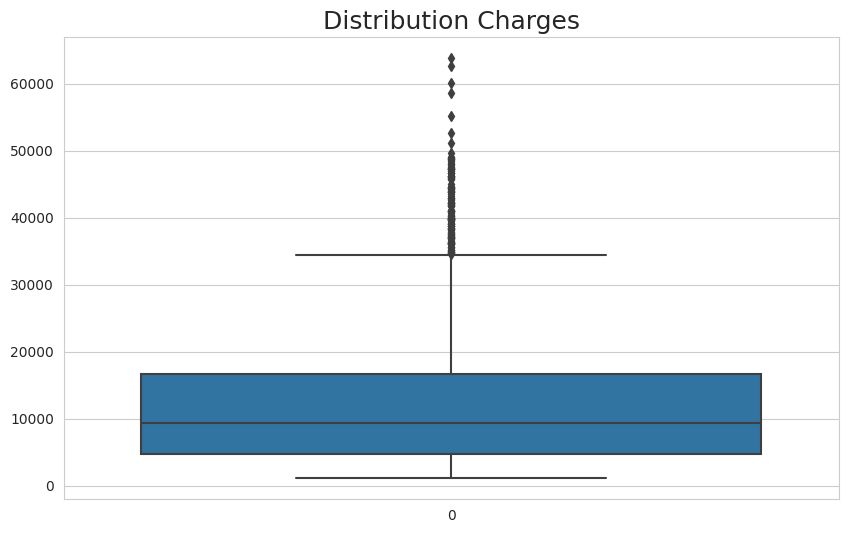

In [20]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

The boxplot shows that we can several outliers. Let us remove these outliers.

In [24]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


In [25]:
df[(df['charges']< Q1-1.5* IQR) | (df['charges']> Q3+1.5* IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


#Univariate Analysis for Categorical Features
We are going to create bar charts to  visualize categorical geatures.
#Gender
Lets see if the observations are evenly distributed between male and female.

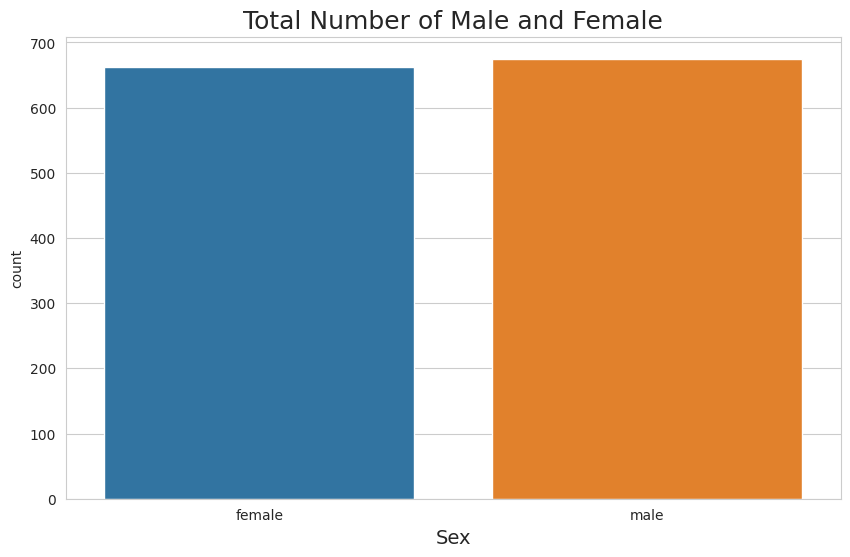

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

Female and Male customers have almost the same number within the variable.

#Children

Lets see the distribution of children that people have.

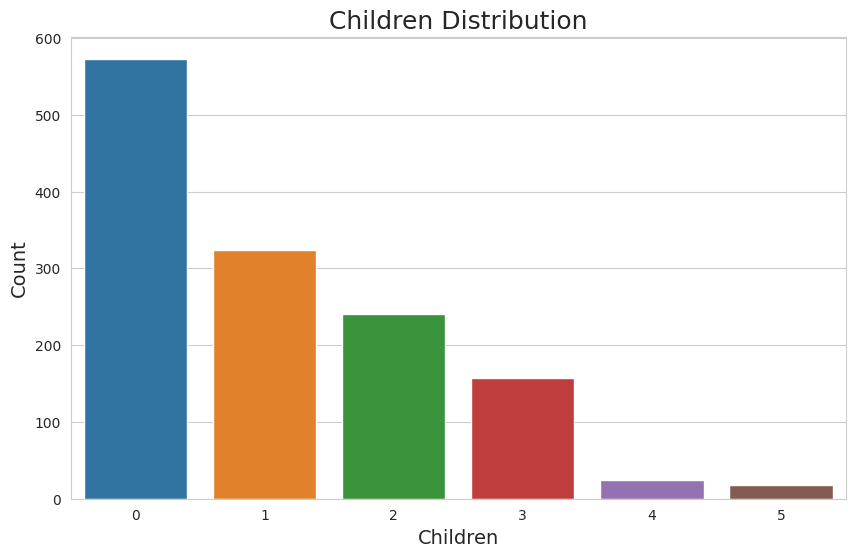

In [31]:
plt.figure(figsize = (10,6))
sns.countplot(x= df["children"])
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()

Most people do not have any children. Very few people have 4 or 5 children.

#Smoker
 Lets see the distribution of smokers and non smokers in the dataset.

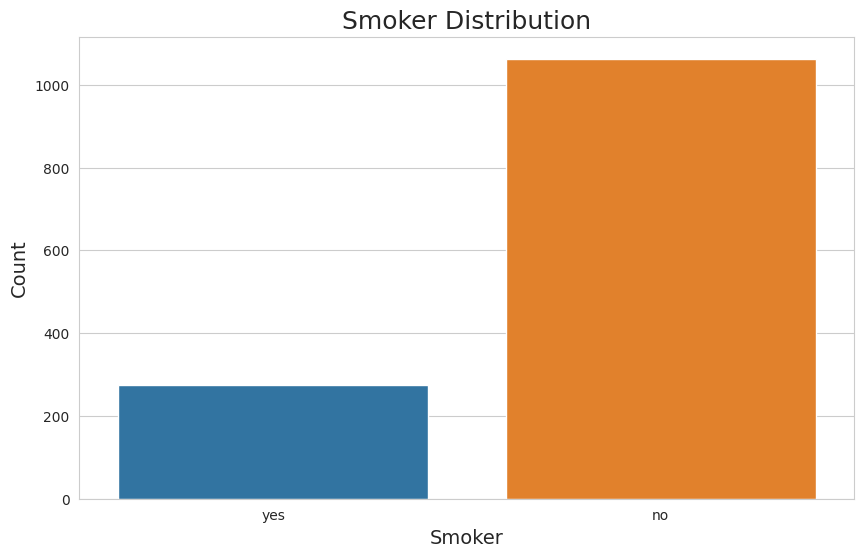

In [33]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['smoker'])
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

The number of smokers is almost 4 times more than non-smokers.

#Region
Lets see the distribution between the different regions and where people are from.

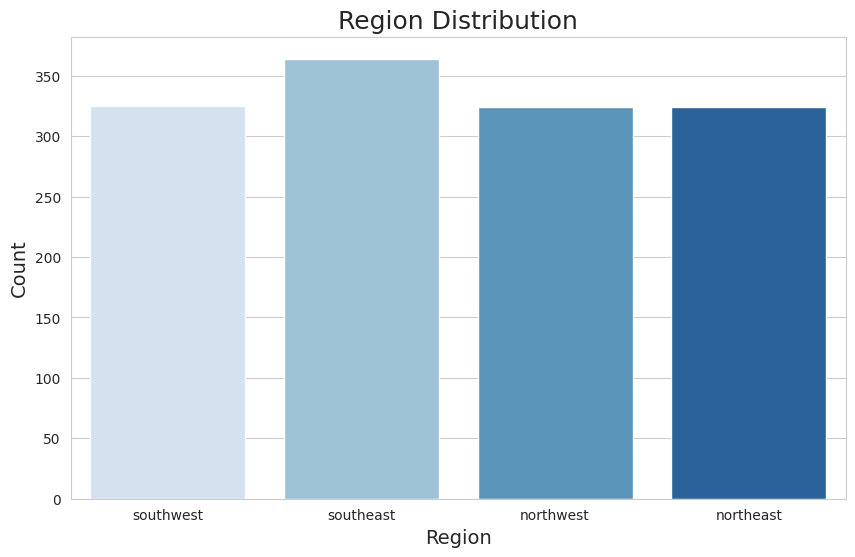

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['region'],palette='Blues')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()

All four regions are almost equally distributed. The number of peopl from the southeast is slightly more than others.

#Bivariate Analysis
Let's view the relationships between two variables.

#Age vs Charges
Since the variables are both quantitative. We will build a scatterplot for this graph.

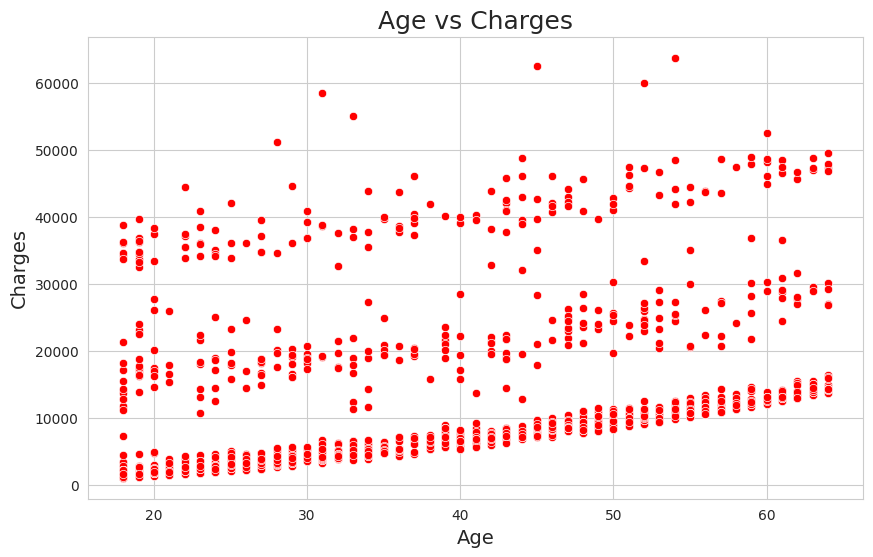

In [36]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',color='r',data=df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

In [38]:
#Correlation of the the two variables
print('Correlation between age and charges is : {}'.format(round(df.corr()['age']['charges'],3)))

Correlation between age and charges is : 0.298


We see that there is a weak positive relationship between the two variables.

#Smoker vs Charges
Since the variabes are both quantitative and qualitative, we will use a boxplot to view the relationship of charges for both smokers and nonsmokers.

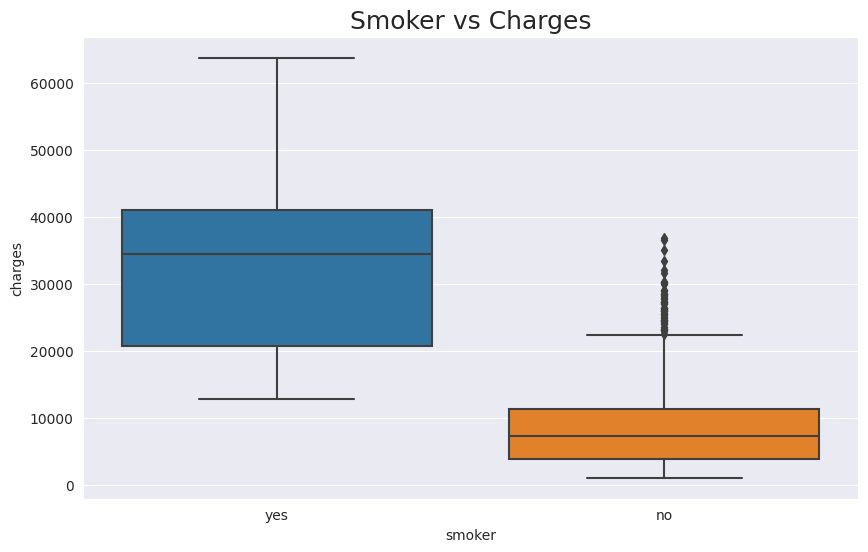

In [39]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18);

The data visualization presents that smokers tend to have a higher cost of insurance.

#Multivariate Analysis
I will create a heatmap to show the relationship between numerica variables.

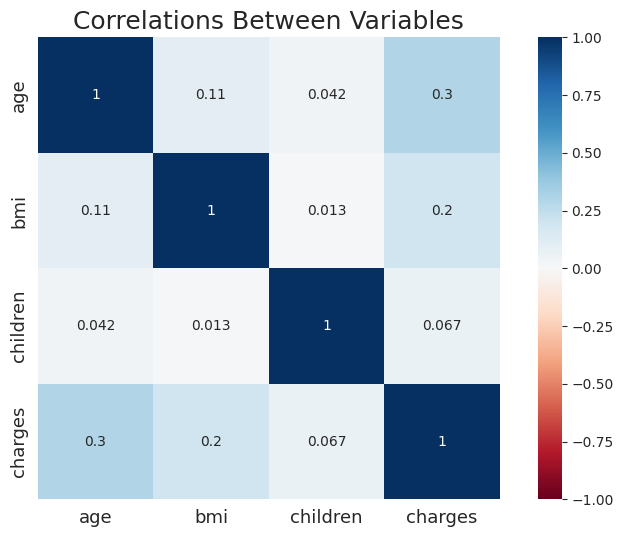

In [40]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

The heatmap shows us there is a correlation between age and charges. As the age increases insurance charges also increase or vice versa.

We can also see that there is a weak correlation between BMI and charges.

There is almost no relationship between children and charges.